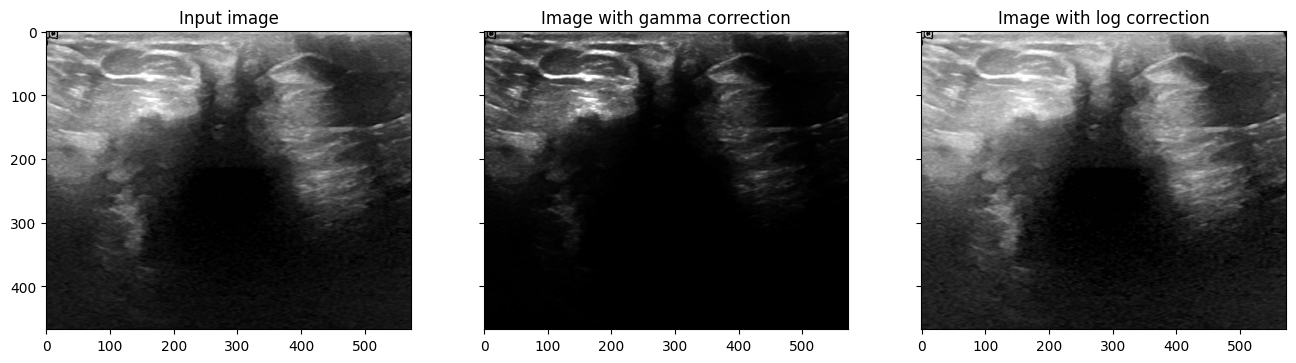

In [53]:
# contrast adjustment
from skimage import exposure
import matplotlib.pyplot as plt
from skimage import util, io
import os
from PIL import Image
import numpy as np


crtDir =  os.getcwd()
img = io.imread("dataset/malignant/malignant (30).png")

gammaCorrectedImg = exposure.adjust_gamma(img, 2)
logCorrectedImg = exposure.adjust_log(img, 1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 8), sharex=True, sharey=True)
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.imshow(gammaCorrectedImg, cmap=plt.cm.gray)
ax2.set_title('Image with gamma correction')

ax3.imshow(logCorrectedImg, cmap=plt.cm.gray)
ax3.set_title('Image with log correction')

plt.show()

In [54]:
import numpy as np

img = np.array([[7, 0, 5],
     [3, 0, 9],
     [0, 6, 8]])
kernel = np.array([[1, 1, 1],
         [-1, -1, -1],
         [1, 1, 1]])

def convolutionOperation(image, kernel):
     # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    kernelSize = kernel.shape[0]

    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    padding = kernelSize // 2
    image_padded = np.zeros((image.shape[0] + padding * 2, image.shape[1] + padding * 2))
    image_padded[padding :-padding, padding:-padding] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x]=(kernel * image_padded[y: y + kernelSize, x: x + kernelSize]).sum()

    return output

print(convolutionOperation(img, kernel))

[[-4  0  4]
 [10 14 10]
 [-3 -2 -5]]


Text(0.5, 1.0, 'Gaussian blur (mediere ponderata)')

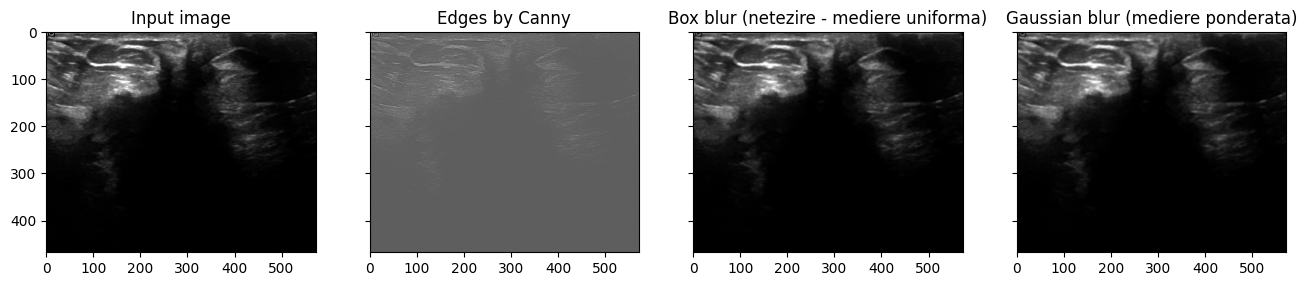

In [55]:
img = gammaCorrectedImg

imgMatrix = []
for i in range(0, img.shape[0]):
    row = []
    for j in range(0, img.shape[1]):
        row.append(img.item(i, j, 0))
    imgMatrix.append(row)
imgMatrix = np.array(imgMatrix)

# high-pass filter
kernelEdgeCanny = np.array([[-1, -1, -1],
                            [-1, 9, -1],
                            [-1, -1, -1]])
cannyImg = convolutionOperation(imgMatrix, kernelEdgeCanny)

# mean filter (new pixel's value = the average of the surrounding pixels)
kernelBoxBlur = np.array([[1/9, 1/9, 1/9],
                          [1/9, 1/9, 1/9],
                          [1/9, 1/9, 1/9]])
boxBlurImg = convolutionOperation(imgMatrix, kernelBoxBlur)

# Gaussian filter (new pixel's value = the weighted mean of the surrounding pixels that gives more weight to the pixel near the current pixel; low-pass filter)
kernelGaussianBlur = np.array([[1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [6 / 256, 24 / 256, 36 / 256, 24 / 256, 6 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256]])
GaussianBlurImg = convolutionOperation(imgMatrix, kernelGaussianBlur)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 8), sharex=True, sharey=True)
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.imshow(cannyImg, cmap=plt.cm.gray)
ax2.set_title('Edges by Canny')

ax3.imshow(boxBlurImg, cmap=plt.cm.gray)
ax3.set_title('Box blur (netezire - mediere uniforma)')

ax4.imshow(GaussianBlurImg, cmap=plt.cm.gray)
ax4.set_title('Gaussian blur (mediere ponderata)')

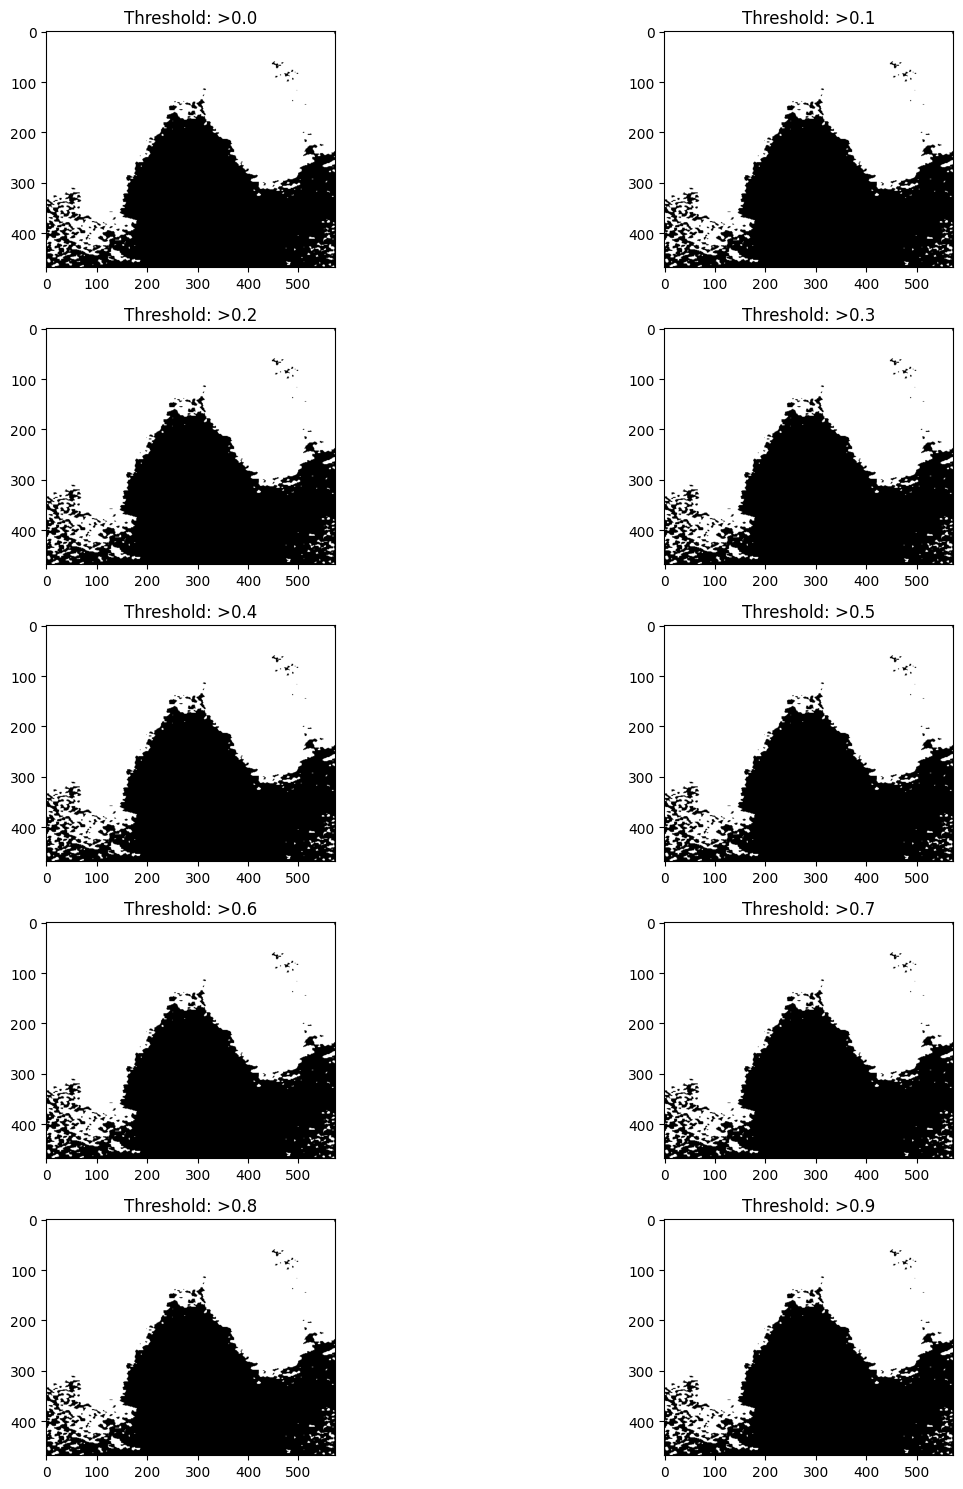

In [58]:
plt.figure(figsize=(15, 15))
for i in range(10):

  # Iterating different thresholds
  binarized_gray = (GaussianBlurImg > i * 0.05)*1
  plt.subplot(5,2,i+1)

  # Rounding of the threshold
  # value to 1 decimal point
  plt.title("Threshold: >"+str(round(i*0.1,1)))

  # Displaying the binarized image
  # of various thresholds
  plt.imshow(binarized_gray, cmap = 'gray')

plt.tight_layout()

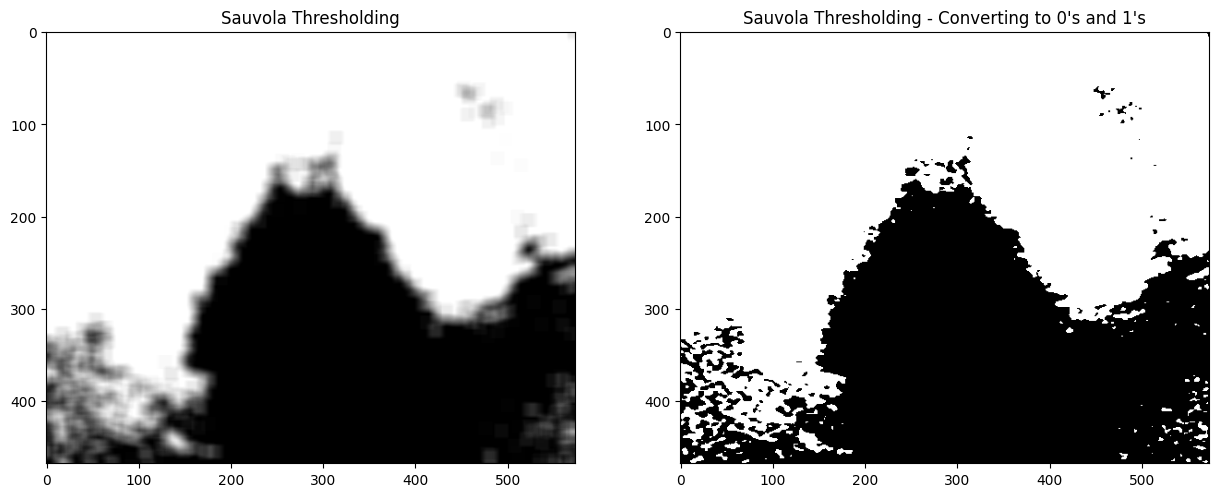

In [57]:
from skimage import filters
# Computing Sauvola's local pixel threshold
# values for every pixel - Not Binarized
plt.figure(figsize=(15, 15))
threshold = filters.threshold_sauvola(binarized_gray)
plt.subplot(1,2,1)
plt.title("Sauvola Thresholding")

# Displaying the local threshold values
plt.imshow(threshold, cmap = "gray")

# Computing Sauvola's local pixel
# threshold values for every pixel - Binarized
binarized_coffee = (binarized_gray > threshold)*1
plt.subplot(1,2,2)
plt.title("Sauvola Thresholding - Converting to 0's and 1's")
plt.imshow(binarized_coffee, cmap = "gray")